In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import neighbors, tree, naive_bayes
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [2]:
bank_df = pd.read_csv('/Users/appobs/Desktop/hw/478/week2/HW1/bank_data.csv', delimiter = ',', sep='\t')
bank_df.head(10)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
5,ID12106,57,37869.60,2,FEMALE,TOWN,YES,NO,YES,YES,NO,YES
6,ID12107,22,8877.07,0,MALE,RURAL,NO,NO,NO,YES,NO,YES
7,ID12108,58,24946.60,0,MALE,TOWN,YES,YES,YES,YES,NO,NO
8,ID12109,37,25304.30,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO
9,ID12110,54,24212.10,2,MALE,TOWN,YES,YES,YES,YES,NO,NO


In [3]:
bank_tar = bank_df.pep
bank_tar.head(10)

0    YES
1     NO
2     NO
3     NO
4     NO
5    YES
6    YES
7     NO
8     NO
9     NO
Name: pep, dtype: object

In [4]:
bank_df = bank_df.reindex(np.random.permutation(bank_df.index))
bank_df.head(10)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
332,ID12433,33,29541.70,0,FEMALE,TOWN,YES,NO,YES,NO,NO,NO
499,ID12600,46,18912.20,0,FEMALE,TOWN,YES,YES,NO,YES,NO,YES
495,ID12596,44,38459.90,0,MALE,INNER_CITY,YES,NO,NO,NO,YES,YES
368,ID12469,21,11281.50,0,MALE,TOWN,YES,NO,YES,YES,YES,NO
11,ID12112,52,26658.80,0,FEMALE,INNER_CITY,NO,YES,YES,YES,YES,NO
223,ID12324,67,43530.00,0,FEMALE,INNER_CITY,YES,NO,YES,YES,YES,NO
196,ID12297,30,18802.40,0,FEMALE,INNER_CITY,NO,NO,NO,YES,YES,YES
478,ID12579,47,23337.20,2,MALE,TOWN,YES,NO,YES,YES,YES,NO
246,ID12347,23,7606.25,3,FEMALE,INNER_CITY,NO,YES,NO,NO,NO,NO
14,ID12115,36,19474.60,0,MALE,RURAL,YES,NO,YES,YES,YES,NO


In [5]:
bank_names = bank_df.columns.values
bank_names

array(['id', 'age', 'income', 'children', 'gender', 'region', 'married',
       'car', 'savings_acct', 'current_acct', 'mortgage', 'pep'],
      dtype=object)

In [6]:
bank_tar = bank_df.pep
bank_tar.head(10)

332     NO
499    YES
495    YES
368     NO
11      NO
223     NO
196    YES
478     NO
246     NO
14      NO
Name: pep, dtype: object

In [7]:
bank_dmy = pd.get_dummies(bank_df[['gender', 'region', 'married',
       'car', 'savings_acct', 'current_acct', 'mortgage']])
bank_dmy.head(10)

,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
332,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0
499,1,0,0,0,0,1,0,1,0,1,1,0,0,1,1,0
495,0,1,1,0,0,0,0,1,1,0,1,0,1,0,0,1
368,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1
11,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1
223,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1
196,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1
478,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1
246,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0
14,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1


In [8]:
bank_numeric = pd.concat([bank_df, bank_dmy], axis=1)
bank_numeric.head(10)
bank_numeric_names = bank_numeric.columns.values
bank_numeric_names

array(['id', 'age', 'income', 'children', 'gender', 'region', 'married',
       'car', 'savings_acct', 'current_acct', 'mortgage', 'pep',
       'gender_FEMALE', 'gender_MALE', 'region_INNER_CITY',
       'region_RURAL', 'region_SUBURBAN', 'region_TOWN', 'married_NO',
       'married_YES', 'car_NO', 'car_YES', 'savings_acct_NO',
       'savings_acct_YES', 'current_acct_NO', 'current_acct_YES',
       'mortgage_NO', 'mortgage_YES'], dtype=object)

In [9]:
bank_numeric = bank_numeric[['age', 'income', 'children','gender_FEMALE', 'gender_MALE', 'region_INNER_CITY',
       'region_RURAL', 'region_SUBURBAN', 'region_TOWN', 'married_NO',
       'married_YES', 'car_NO', 'car_YES', 'savings_acct_NO',
       'savings_acct_YES', 'current_acct_NO', 'current_acct_YES',
       'mortgage_NO', 'mortgage_YES']]

bank_numeric.head(10)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
332,33,29541.70,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0
499,46,18912.20,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,1,0
495,44,38459.90,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,0,1
368,21,11281.50,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1
11,52,26658.80,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1
223,67,43530.00,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1
196,30,18802.40,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1
478,47,23337.20,2,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1
246,23,7606.25,3,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0
14,36,19474.60,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1


In [10]:
tpercent = 0.8
tsize = int(np.floor(tpercent * len(bank_numeric)))
bank_train = bank_numeric[:tsize]
bank_test = bank_numeric[tsize:]

In [11]:
print (bank_train.shape)
print (bank_test.shape)

bank_train.head(10)

(480, 19)
(120, 19)


,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
332,33,29541.70,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0
499,46,18912.20,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,1,0
495,44,38459.90,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,0,1
368,21,11281.50,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1
11,52,26658.80,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1
223,67,43530.00,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1
196,30,18802.40,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1
478,47,23337.20,2,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1
246,23,7606.25,3,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0
14,36,19474.60,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1


In [12]:
bank_target_train = bank_tar[0:int(tsize)]
bank_target_test = bank_tar[int(tsize):len(bank_numeric)]

bank_target_train.head(10)

332     NO
499    YES
495    YES
368     NO
11      NO
223     NO
196    YES
478     NO
246     NO
14      NO
Name: pep, dtype: object

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(bank_train)

/Users/appobs/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
bank_train_norm = min_max_scaler.fit_transform(bank_train)
bank_test_norm = min_max_scaler.fit_transform(bank_test)

/Users/appobs/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/appobs/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [15]:
np.set_printoptions(precision=2, linewidth=100)
bank_train_norm[:10]

array([[0.31, 0.42, 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 1.  , 0.  ],
       [0.57, 0.22, 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ,
        0.  , 1.  , 1.  , 0.  ],
       [0.53, 0.58, 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  ,
        1.  , 0.  , 0.  , 1.  ],
       [0.06, 0.07, 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  ],
       [0.69, 0.36, 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  ],
       [1.  , 0.68, 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  ],
       [0.24, 0.22, 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  ,
        0.  , 1.  , 0.  , 1.  ],
       [0.59, 0.3 , 0.67, 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0. 

In [16]:
bank_target_train = np.array(bank_target_train)
bank_target_test = np.array(bank_target_test)

In [17]:
print (bank_target_train)
print ("\n")
print (bank_target_test)

['NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO'
 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES'
 'NO' 'YES' 'NO' 'YES'

In [18]:
n_neighbors = 10

knnclf = neighbors.KNeighborsClassifier(n_neighbors)
knnclf.fit(bank_train_norm, bank_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [19]:
knnpreds_test = knnclf.predict(bank_test_norm)

In [20]:
print (knnpreds_test)

['NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO'
 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO']


In [21]:
print(classification_report(bank_target_test, knnpreds_test))

              precision    recall  f1-score   support

          NO       0.74      0.78      0.76        76
         YES       0.57      0.52      0.55        44

   micro avg       0.68      0.68      0.68       120
   macro avg       0.66      0.65      0.65       120
weighted avg       0.68      0.68      0.68       120



In [22]:
knncm = confusion_matrix(bank_target_test, knnpreds_test)
print (knncm)

[[59 17]
 [21 23]]


In [23]:
print (knnclf.score(bank_test_norm, bank_target_test))


0.6833333333333333


In [24]:
print (knnclf.score(bank_train_norm, bank_target_train))

0.7229166666666667


In [25]:
#### Decision Tree Classificer
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(bank_train_norm, bank_target_train)

In [26]:
treepreds_test = treeclf.predict(bank_test_norm)
print (treepreds_test)

['NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES'
 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES'
 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES']


In [31]:
print(classification_report(bank_target_test, treepreds_test))

              precision    recall  f1-score   support

          NO       0.89      0.84      0.86        76
         YES       0.75      0.82      0.78        44

   micro avg       0.83      0.83      0.83       120
   macro avg       0.82      0.83      0.82       120
weighted avg       0.84      0.83      0.83       120



In [28]:
print (treeclf.score(bank_test_norm, bank_target_test))

0.8333333333333334


In [30]:
print (treeclf.score(bank_train_norm, bank_target_train))

0.9916666666666667


In [33]:
treecm = confusion_matrix(bank_target_test, treepreds_test)
print (treecm)

[[64 12]
 [ 8 36]]


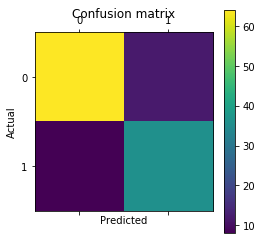

In [34]:
%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [35]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(bank_train_norm, bank_target_train)
nbpreds_test = nbclf.predict(bank_test_norm)
print (nbpreds_test)

['NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO'
 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO']


In [36]:
print (nbclf.score(bank_test_norm, bank_target_test))

0.6083333333333333


In [37]:
print (nbclf.score(bank_train_norm, bank_target_train))

0.6625


In [38]:
print(classification_report(bank_target_test, nbpreds_test))

              precision    recall  f1-score   support

          NO       0.70      0.66      0.68        76
         YES       0.47      0.52      0.49        44

   micro avg       0.61      0.61      0.61       120
   macro avg       0.59      0.59      0.59       120
weighted avg       0.62      0.61      0.61       120



In [40]:
nbcm = confusion_matrix(bank_target_test, nbpreds_test)
print (treecm)

[[50 26]
 [21 23]]


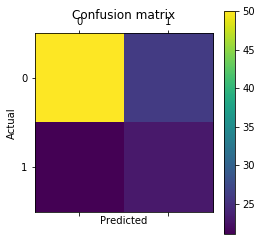

In [41]:
%matplotlib inline
plt.matshow(nbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()